# Bring Relevant Clusters on TSNE

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import IPython.display as ipd

In [2]:
dpath='/grand/projects/BirdAudio/Soundscapes/TSNE_Data/Clusters/'
df = pd.read_csv (os.path.join(dpath, 'Data.csv'))

df

,Unnamed: 0,detection,confidence,year,month,day,hour,minute,second,week,weekday,device,set,x,y,labels,paths
0,0,Black-capped Chickadee,0.339766,2021,7,2,17,31,46,26,5,23757,set1,-40.134296,-5.549396,590,set1/00023757/20210702_STUDY/20210702T170007-0...
1,1,Black-capped Chickadee,0.959739,2021,7,2,17,31,46,26,5,23757,set1,-40.134296,-5.549396,590,set1/00023757/20210702_STUDY/20210702T170007-0...
2,2,No detection,1.000000,2021,7,21,23,8,27,29,3,23700,set2,6.699426,-110.575287,0,set2/00023700/20210721_STUDY/20210721T202300-0...
3,3,Eastern Wood-Pewee,0.348770,2021,6,19,13,14,15,24,6,23764,set1,-96.209358,30.586857,1,set1/00023764/20210619_STUDY/20210619T130000+0...
4,4,Indigo Bunting,0.993506,2021,7,16,9,36,57,28,5,4862,set2,6.273180,-6.140778,645,set2/00004862/20210716_STUDY/20210716T063151-0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202365,202365,Baltimore Oriole,0.155123,2021,7,15,14,30,24,28,4,23700,set2,-1.896797,42.751675,231,set2/00023700/20210715_STUDY/20210715T131730-0...
202366,202366,No detection,1.000000,2021,8,25,23,2,6,34,3,4879,set3,78.315742,81.285347,523,set3/00004879/20210825_STUDY/20210825T170000-0...
202367,202367,No detection,1.000000,2021,5,28,20,40,21,21,5,23764,set1,-72.177475,71.208878,30,set1/00023764/20210528_STUDY/20210528T200000+0...
202368,202368,No detection,1.000000,2021,8,12,21,54,12,32,4,23734,set3,116.707939,-28.699533,111,set3/00023734/20210812_STUDY/20210812T202300-0...


Text(0.5, 1.0, 'Bird detections')

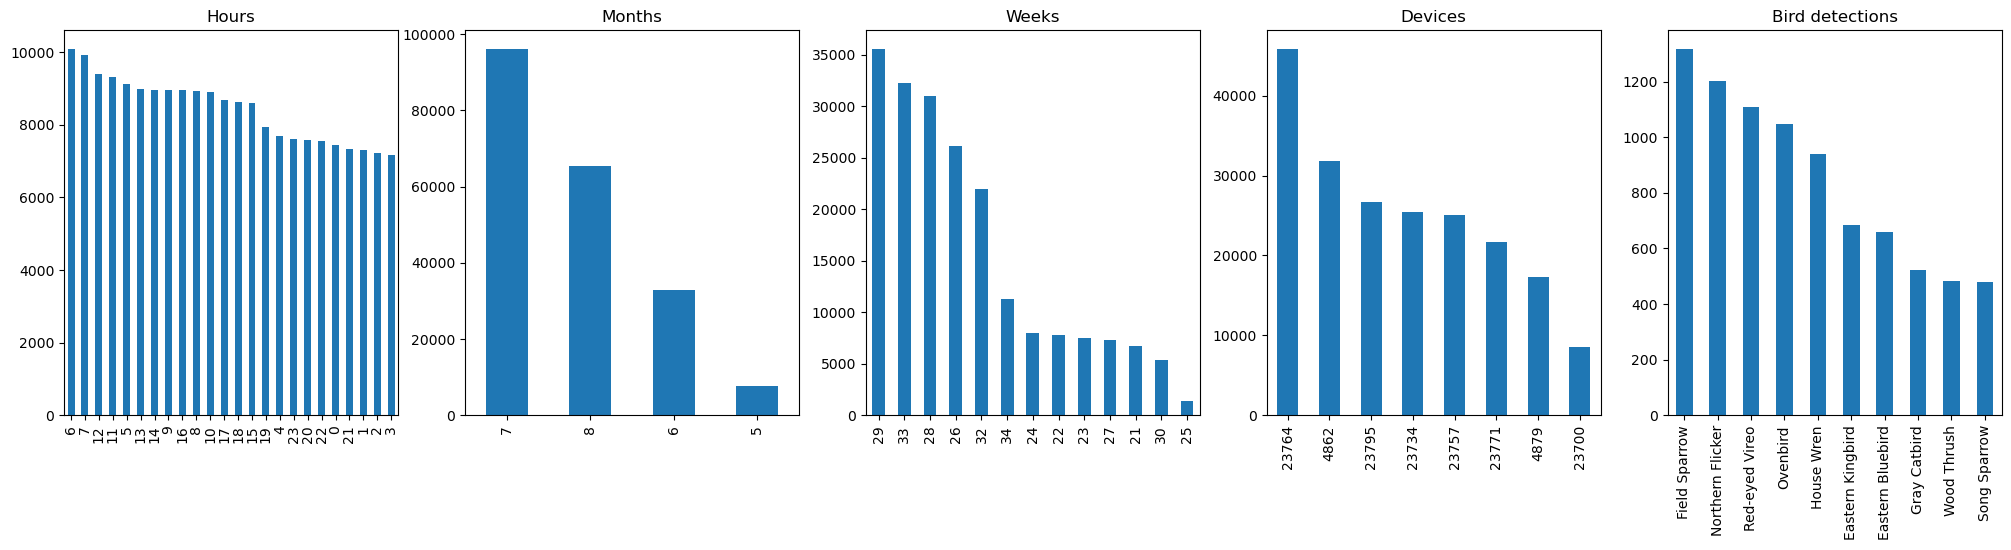

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
#df.labels.value_counts()[0:10].plot.bar(ax=axes[0])
df.hour.value_counts().plot.bar(ax=axes[0])
df.month.value_counts().plot.bar(ax=axes[1])
df.week.value_counts().plot.bar(ax=axes[2])
df.device.value_counts().plot.bar(ax=axes[3])
df.detection.value_counts()[20:30].plot.bar(ax=axes[4])

axes[0].set_title("Hours")
axes[1].set_title("Months")
axes[2].set_title("Weeks")
axes[3].set_title("Devices")
axes[4].set_title("Bird detections")

#axes[0].set_title("Birds on cluster number " + str(label))


In [4]:
df=df[df['confidence']>0.0]
clusters=[]
for label in np.unique(df['labels']):
    aux1 = {}
    aux=df[df['labels']==label]
    bird_detection_rate = aux[aux['detection']!='No detection'].size/aux.size
    aux1['label']=label
    aux1['detection_rate']=bird_detection_rate
    clusters.append(aux1)

clusters = pd.DataFrame(data=clusters)

<AxesSubplot: >

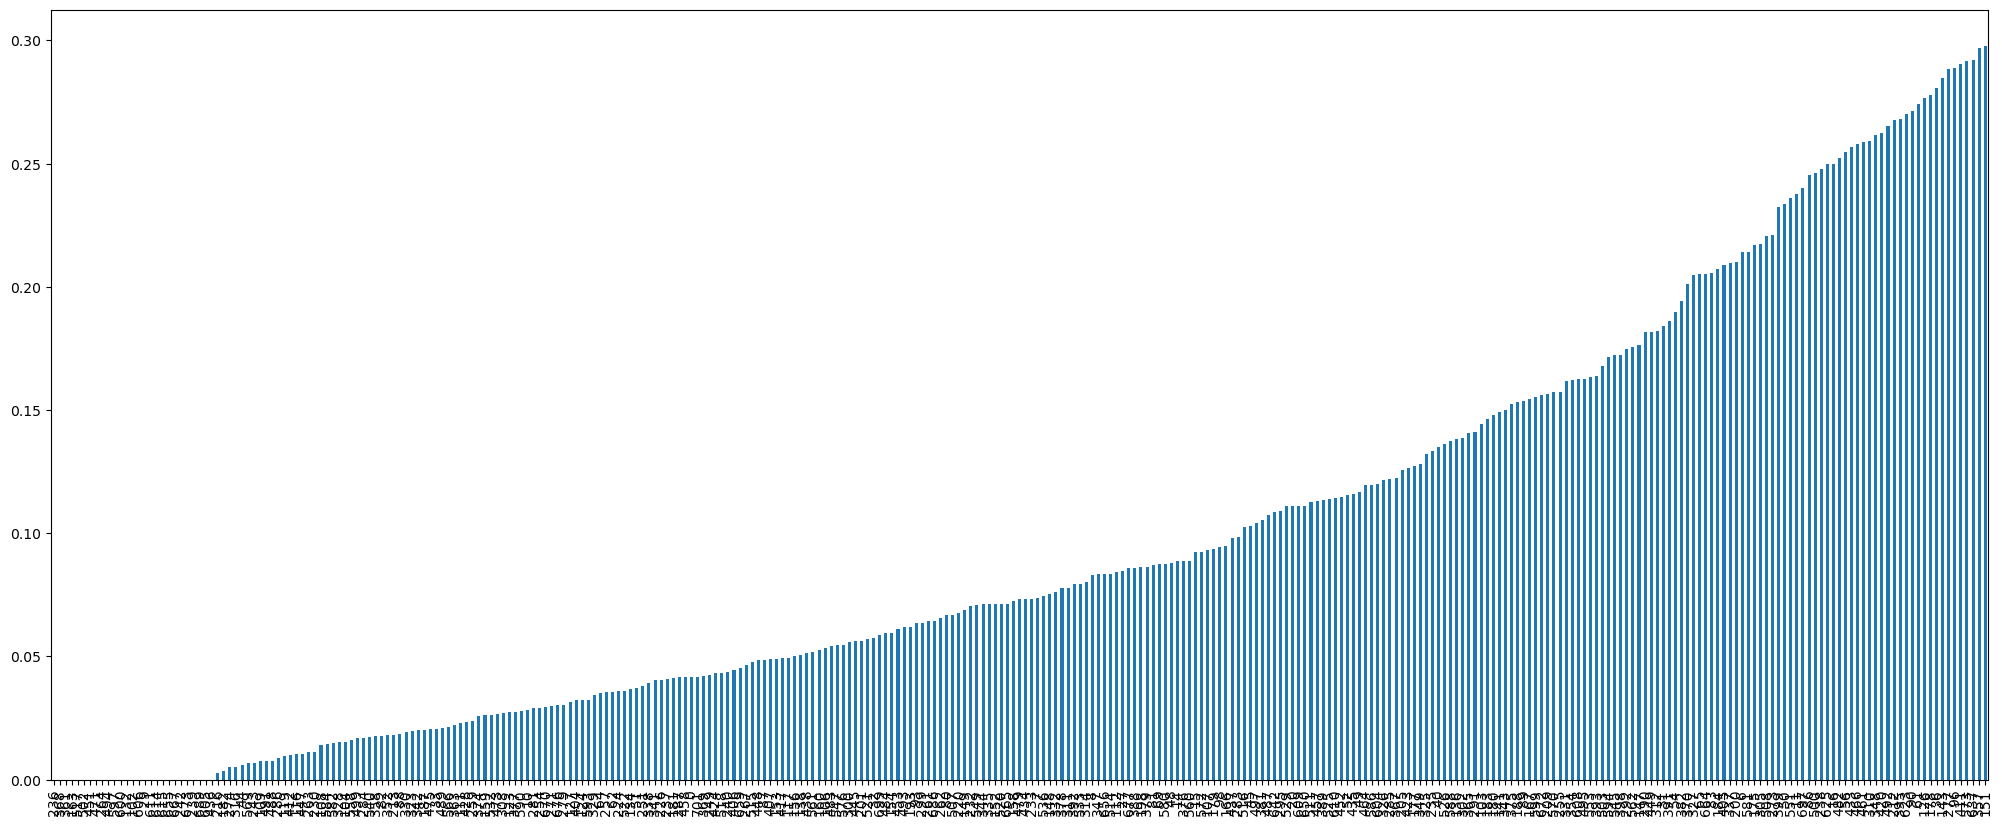

In [17]:
relevant_clusters = clusters[clusters['detection_rate']<0.999]
relevant_clusters = relevant_clusters[relevant_clusters['detection_rate']<0.3]
# relevant_clusters = relevant_clusters[relevant_clusters['detection_rate']>0.7]
relevant_clusters = relevant_clusters.sort_values('detection_rate')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 10))
relevant_clusters.detection_rate.plot.bar(ax=axes)

In [18]:
unique_labels=np.unique(relevant_clusters['label'])
relevant_clusters.shape[0]

319

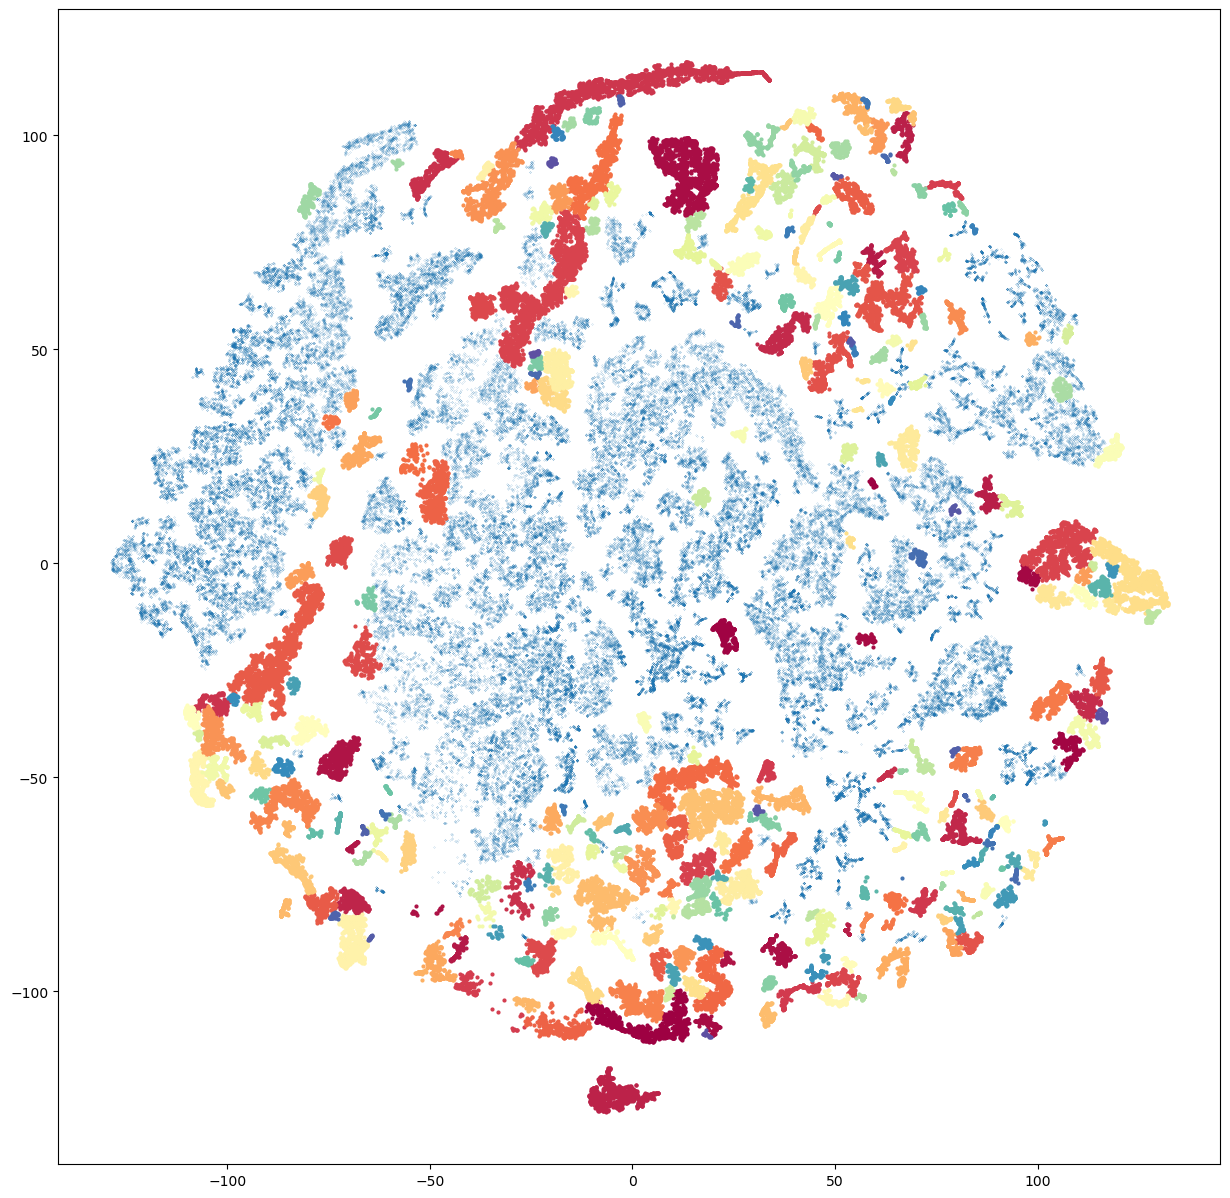

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(df['x'],df['y'],s=0.01)
patches=[]
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    #print(k)
    samples = df[df['labels']==k]
    #print(samples.shape[0])
    ax.plot(
        samples['x'],
        samples['y'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=2,
    )

    #ax.scatter(samples['x'],samples['y'],s=15.5)
    
    patch = mpatches.Patch(color=col, label=k)
    patches.append(patch)


#ax.legend(handles=patches)
fig.set_size_inches(15, 15)

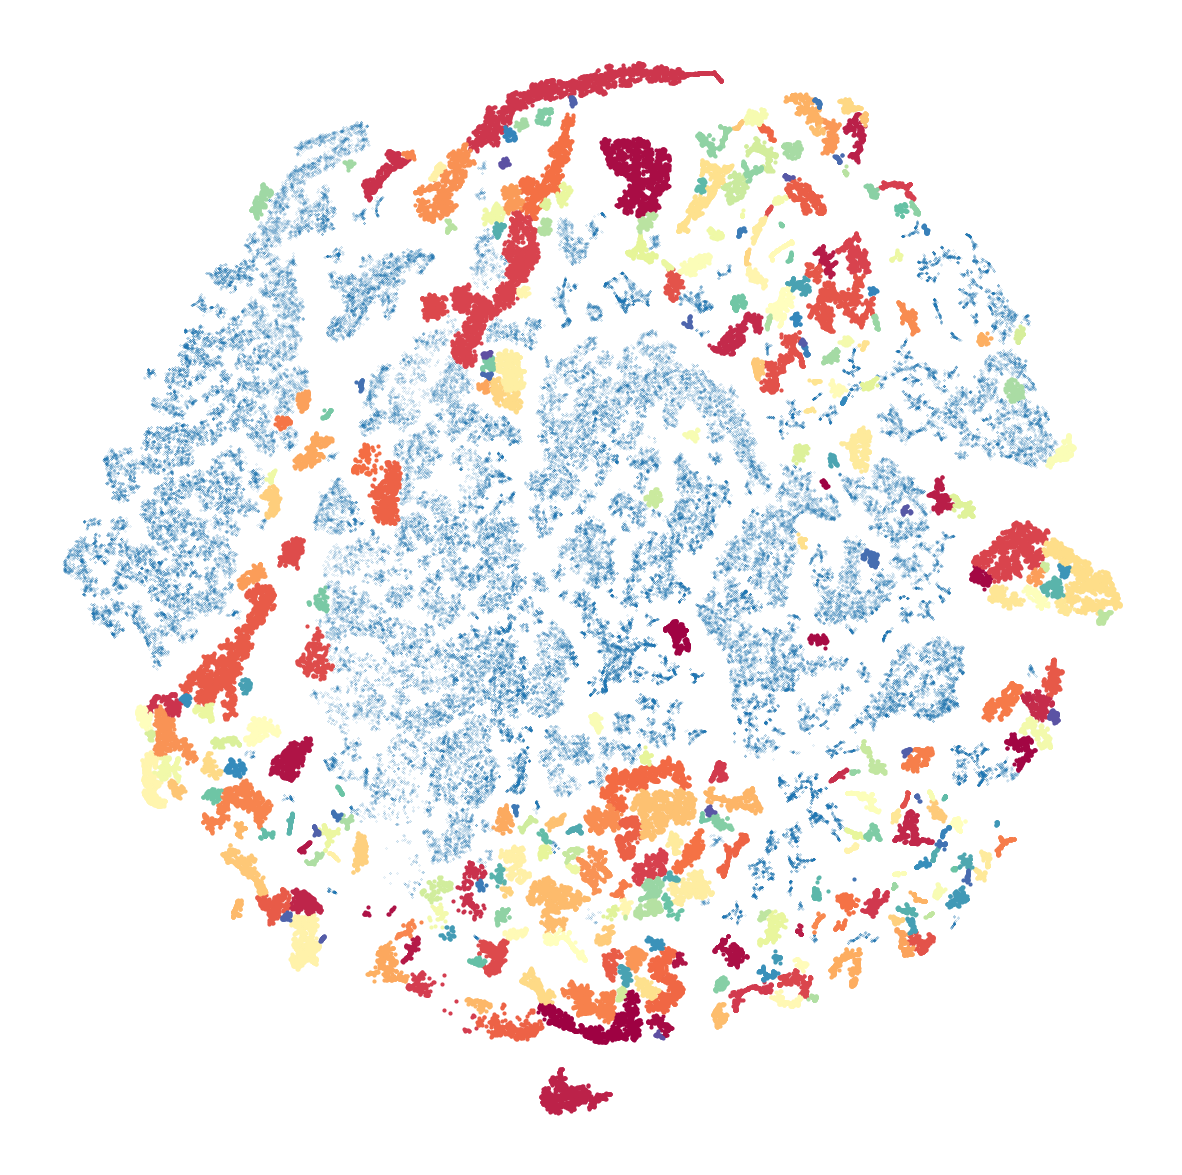

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(df['x'],df['y'],s=0.01)
patches=[]
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    samples = df[df['labels']==k]
    ax.plot(
        samples['x'],
        samples['y'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=2,
    )
    
    patch = mpatches.Patch(color=col, label=k)
    patches.append(patch)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

fig.set_size_inches(15, 15)

# plt.savefig("bird_detection_greater_than_0.7.png", dpi=300)
plt.savefig("bird_detection_less_than_0.3.png", dpi=300)

In [ ]:
nrows=100
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(25, nrows*5))
for k, label in enumerate(unique_labels):
    if k < nrows:
        samples = df[df['labels']==label]
        #samples = samples[samples['confidence']>0.5]
        #samples = samples[samples['detection']!='No detection']
        #print(k)
        #print(label)
        samples.detection.value_counts()[0:10].plot.bar(ax=axes[k, 0])
        samples.device.value_counts().plot.bar(ax=axes[k,1])
        samples.week.value_counts().plot.bar(ax=axes[k,2])
        samples.hour.value_counts().plot.bar(ax=axes[k,3])

        
        axes[k, 0].set_title("Birds on cluster number " + str(label))
        axes[k, 1].set_title("Devices on cluster number " + str(label))
        axes[k, 2].set_title("Weeks on cluster number " + str(label))
        axes[k, 3].set_title("Hours on cluster number " + str(label))

fig.subplots_adjust(hspace=1.50)

In [ ]:
cluster=197
samples=df[df['labels']==cluster]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(df['x'],df['y'],s=0.01)
ax.scatter(samples['x'],samples['y'],s=5)

fig.set_size_inches(20, 20)

In [ ]:
samples=df[df['labels']==cluster]
Spectrograms_BASE_PATH = '/grand/projects/BirdAudio/Soundscapes/First_Filtered_Spectrograms/'
Audio_BASE_PATH = '/grand/projects/BirdAudio/Soundscapes/Audio_Files/'
spectrogram_duration=9
for k, row in enumerate(samples.iterrows()):
    if k > 100:
        break
        
    file_path = row[1]['paths']
    print(row[1]['detection'])
    print(row[1]['confidence'])
    img = Image.open(os.path.join(Spectrograms_BASE_PATH, file_path))
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
